
# 🔍 Tech Layoffs Data Analysis

This project explores global tech layoffs from Mar. 2020 using data from Layoffs.fyi. The focus is on identifying patterns over time, across geographies, funding stages and industries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [6]:
# Load layoffs dataset
layoff_data = pd.read_csv('Layoffs.fyi  - Tech Layoffs Tracker.csv')
layoff_data

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,Match Group,New York City,325.0,5/8/2025,13%,Consumer,https://www.bloomberg.com/news/articles/2025-0...,Post-IPO,NaN,United States,5/9/2025
1,CrowdStrike,SF Bay Area,500.0,5/7/2025,5%,Security,https://www.wsj.com/business/crowdstrike-to-cu...,Post-IPO,$1200,United States,5/7/2025
2,GenWise,"New Delhi,Non-U.S.",15.0,5/5/2025,20%,Other,https://entrackr.com/exclusive/exclusive-z47-b...,Seed,$3,India,5/5/2025
3,General Fusion,"Vancouver,Non-U.S.",NaN,5/5/2025,25%,Energy,https://techcrunch.com/2025/05/05/layoffs-hit-...,Unknown,$370,Canada,5/5/2025
4,Deep Instinct,"Tel Aviv,Non-U.S.",20.0,5/4/2025,10%,Security,https://www.calcalistech.com/ctechnews/article...,Unknown,$322,Israel,5/5/2025
...,...,...,...,...,...,...,...,...,...,...,...
4056,Service,Los Angeles,NaN,3/16/2020,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,$5,United States,8/31/2020
4057,HopSkipDrive,Los Angeles,8.0,3/13/2020,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States,4/2/2020
4058,Panda Squad,SF Bay Area,6.0,3/13/2020,75%,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States,4/16/2020
4059,Tamara Mellon,Los Angeles,20.0,3/12/2020,40%,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States,3/31/2020


In [8]:
# Clean columns
layoff_data.columns = layoff_data.columns.str.strip().str.replace(' ', '_')
layoff_data = layoff_data.rename(columns={'#_Laid_Off': 'Laid_Off', '%': 'Percentage(%)', '$_Raised_(mm)': 'Raised($mil)'})
layoff_data['Date'] = pd.to_datetime(layoff_data['Date'], errors='coerce')
layoff_data.dropna(subset=['Date', 'Laid_Off'], inplace=True)
layoff_data['Month'] = layoff_data['Date'].dt.to_period('M')
layoff_data

,Company,Location_HQ,Laid_Off,Date,Percentage(%),Industry,Source,Stage,Raised($mil),Country,Date_Added,Month
0,Match Group,New York City,325.0,2025-05-08,13%,Consumer,https://www.bloomberg.com/news/articles/2025-0...,Post-IPO,NaN,United States,5/9/2025,2025-05
1,CrowdStrike,SF Bay Area,500.0,2025-05-07,5%,Security,https://www.wsj.com/business/crowdstrike-to-cu...,Post-IPO,$1200,United States,5/7/2025,2025-05
2,GenWise,"New Delhi,Non-U.S.",15.0,2025-05-05,20%,Other,https://entrackr.com/exclusive/exclusive-z47-b...,Seed,$3,India,5/5/2025,2025-05
4,Deep Instinct,"Tel Aviv,Non-U.S.",20.0,2025-05-04,10%,Security,https://www.calcalistech.com/ctechnews/article...,Unknown,$322,Israel,5/5/2025,2025-05
6,Beam,"Bristol,Non-U.S.",200.0,2025-05-01,100%,Other,https://sifted.eu/articles/beam-robotics-shuts...,Unknown,NaN,United Kingdom,5/2/2025,2025-05
...,...,...,...,...,...,...,...,...,...,...,...,...
4055,Help.com,Austin,16.0,2020-03-16,100%,Support,LinkedIn,Seed,$6,United States,4/15/2020,2020-03
4057,HopSkipDrive,Los Angeles,8.0,2020-03-13,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States,4/2/2020,2020-03
4058,Panda Squad,SF Bay Area,6.0,2020-03-13,75%,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States,4/16/2020,2020-03
4059,Tamara Mellon,Los Angeles,20.0,2020-03-12,40%,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States,3/31/2020,2020-03


In [12]:
columns = ['Company', 'Location_HQ', 'Laid_Off', 'Date', 'Month', 'Percentage(%)',
       'Industry', 'Stage', 'Raised($mil)', 'Country', 'Date_Added', 'Source']
layoff_data = layoff_data[columns]

In [20]:
# Creating a country flag (US vs. Others)
def classify_country(Location_HQ):
    if pd.isnull(Location_HQ):
        return 'Unknown'
    if 'non' in Location_HQ.lower():
        return 'Other'
    return 'US'

layoff_data['Country_group'] = layoff_data['Location_HQ'].apply(classify_country)
layoff_data

/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/2183152110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layoff_data['Country_group'] = layoff_data['Location_HQ'].apply(classify_country)


,Company,Location_HQ,Laid_Off,Date,Month,Percentage(%),Industry,Stage,Raised($mil),Country,Date_Added,Source,Country_group
0,Match Group,New York City,325.0,2025-05-08,2025-05,13%,Consumer,Post-IPO,NaN,United States,5/9/2025,https://www.bloomberg.com/news/articles/2025-0...,US
1,CrowdStrike,SF Bay Area,500.0,2025-05-07,2025-05,5%,Security,Post-IPO,$1200,United States,5/7/2025,https://www.wsj.com/business/crowdstrike-to-cu...,US
2,GenWise,"New Delhi,Non-U.S.",15.0,2025-05-05,2025-05,20%,Other,Seed,$3,India,5/5/2025,https://entrackr.com/exclusive/exclusive-z47-b...,Other
4,Deep Instinct,"Tel Aviv,Non-U.S.",20.0,2025-05-04,2025-05,10%,Security,Unknown,$322,Israel,5/5/2025,https://www.calcalistech.com/ctechnews/article...,Other
6,Beam,"Bristol,Non-U.S.",200.0,2025-05-01,2025-05,100%,Other,Unknown,NaN,United Kingdom,5/2/2025,https://sifted.eu/articles/beam-robotics-shuts...,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,Help.com,Austin,16.0,2020-03-16,2020-03,100%,Support,Seed,$6,United States,4/15/2020,LinkedIn,US
4057,HopSkipDrive,Los Angeles,8.0,2020-03-13,2020-03,10%,Transportation,Unknown,$45,United States,4/2/2020,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,US
4058,Panda Squad,SF Bay Area,6.0,2020-03-13,2020-03,75%,Consumer,Seed,$1,United States,4/16/2020,https://twitter.com/danielsinger/status/123854...,US
4059,Tamara Mellon,Los Angeles,20.0,2020-03-12,2020-03,40%,Retail,Series C,$90,United States,3/31/2020,https://layoffs.fyi/list/tamara-mellon/,US


In [22]:
layoff_data['Laid_Off'].sum()

732397.0

/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3669928370.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3669928370.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("monthly_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3669928370.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("monthly_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3669928370.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("monthly_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3669

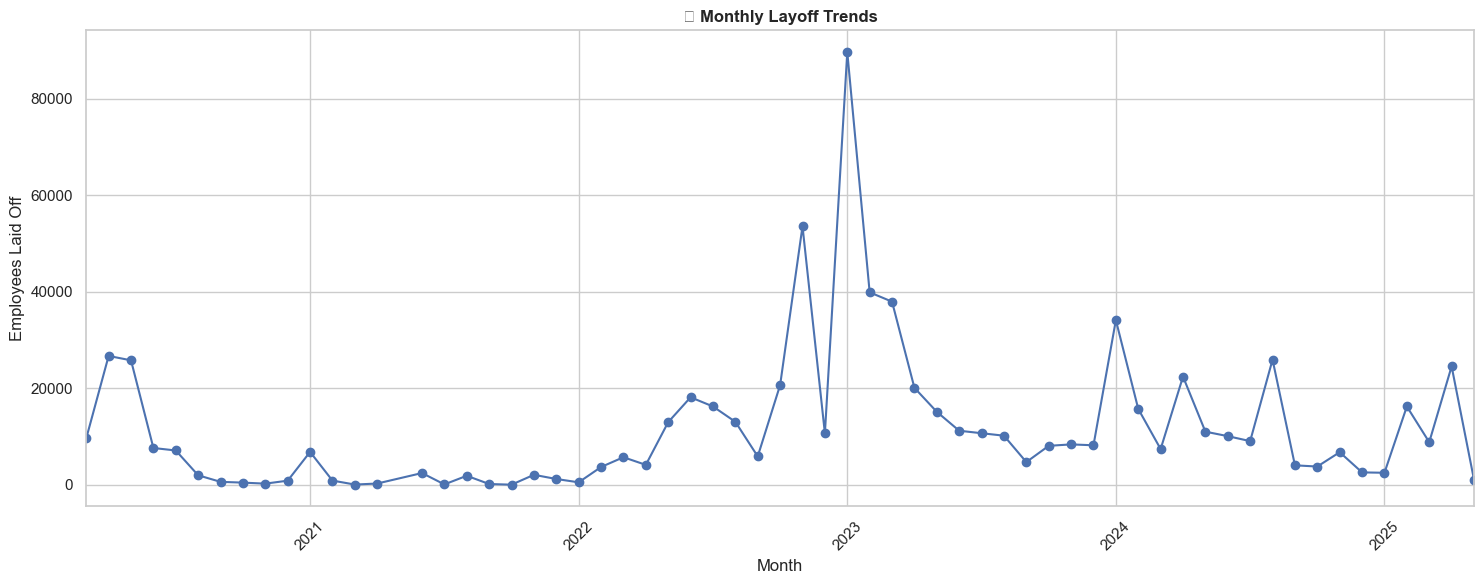

In [90]:
#Visualizing the monthly layoffs over time
monthly_layoffs = layoff_data.groupby('Month')['Laid_Off'].sum()
plt.figure(figsize=(15,6))
monthly_layoffs.plot(marker='o')
plt.title("📈 Monthly Layoff Trends", size=12, weight='bold')
plt.ylabel("Employees Laid Off")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()


In [44]:
country_layoffs = layoff_data.groupby('Country_group')['Laid_Off'].sum()

/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/1873686958.py:9: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/1873686958.py:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig("layoffs_by_country.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/1873686958.py:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig("layoffs_by_country.jpg", format="jpg", dpi=300, bbox_inches='tight')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


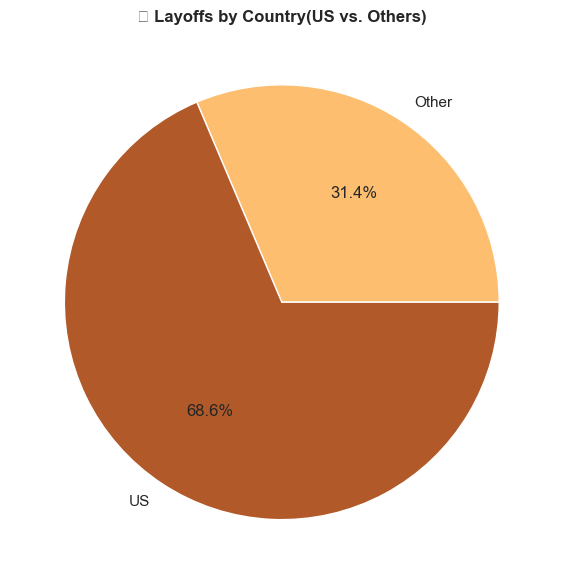

In [92]:
plt.figure(figsize=(6,6))
plt.pie(
    country_layoffs.values, 
    labels=country_layoffs.index, 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired(np.linspace(0.5, 1, len(country_layoffs)))
)
plt.title('🌍 Layoffs by Country(US vs. Others)', size=12, weight='bold')
plt.tight_layout()
plt.savefig("layoffs_by_country.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3478978653.py:9: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  plt.tight_layout()
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3478978653.py:10: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  plt.savefig("stage_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3478978653.py:10: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  plt.savefig("stage_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


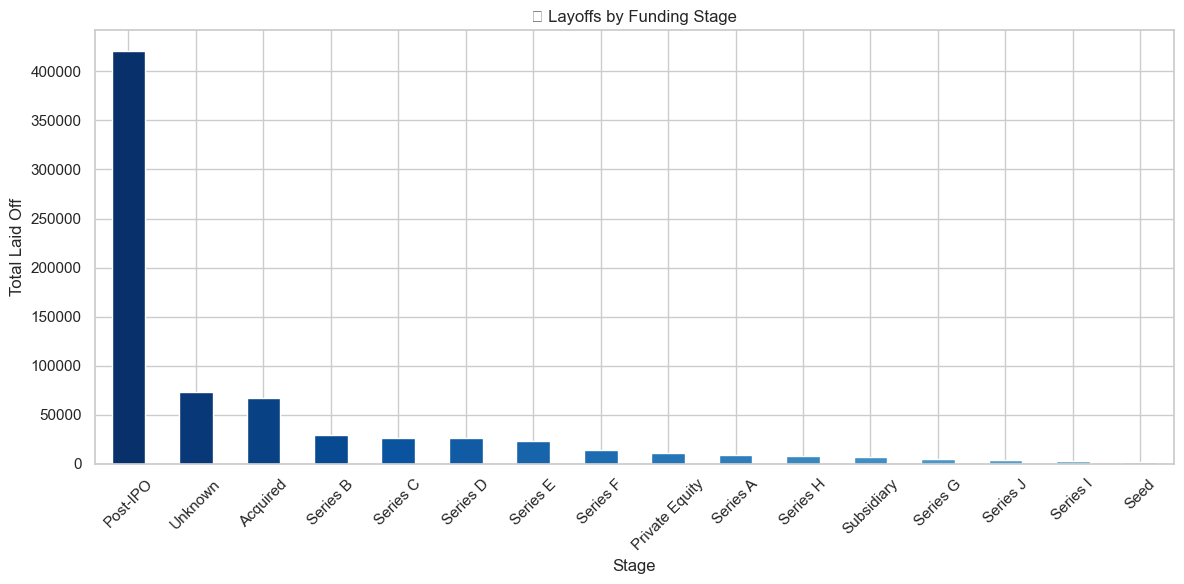

In [94]:
#Relationship between the stage of the companies and layoffs
stage_layoffs = layoff_data.groupby('Stage')['Laid_Off'].sum().sort_values(ascending=False)
stage_layoffs.plot(kind='bar',
                   color=plt.cm.Blues(np.linspace(1, 0.5, len(stage_layoffs)))
                  )
plt.title("🏢 Layoffs by Funding Stage")
plt.ylabel("Total Laid Off")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("stage_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3315208946.py:7: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3315208946.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.savefig("top_companies_by_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/3315208946.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.savefig("top_companies_by_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


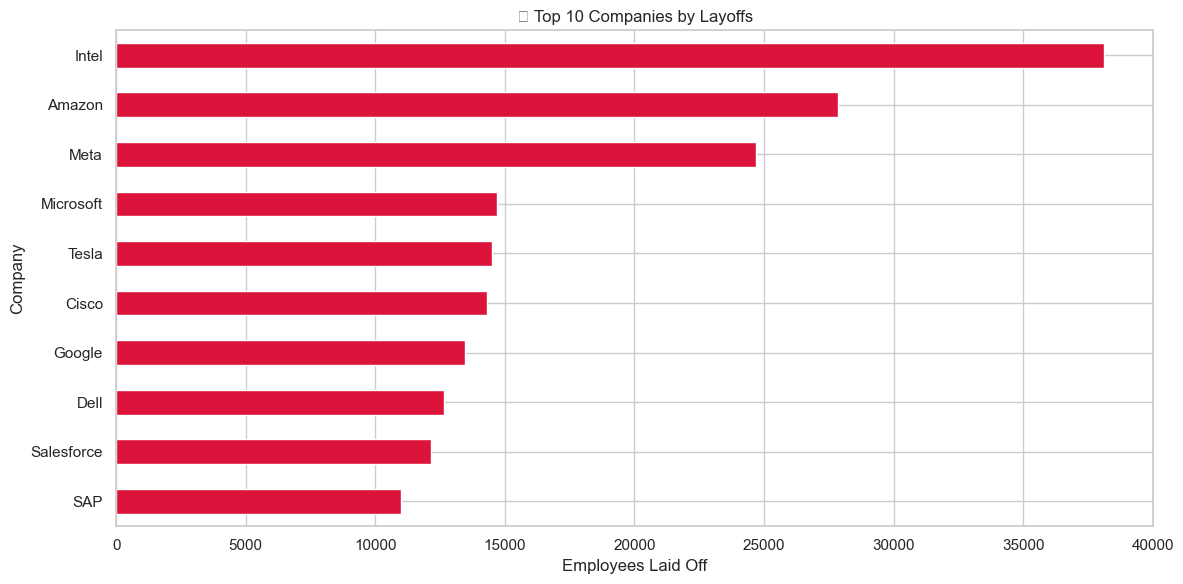

In [96]:
#Top 10 companies by layoffs
top_companies = layoff_data.groupby('Company')['Laid_Off'].sum().sort_values(ascending=False).head(10)
top_companies.plot(kind='barh', color='crimson')
plt.title("🏆 Top 10 Companies by Layoffs")
plt.xlabel("Employees Laid Off")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_companies_by_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/cv/331z57nn3zscjyzqpngg3zdm0000gn/T/ipykernel_27202/2816691889.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_layoffs, x='Industry', y='Laid_Off', palette='viridis')


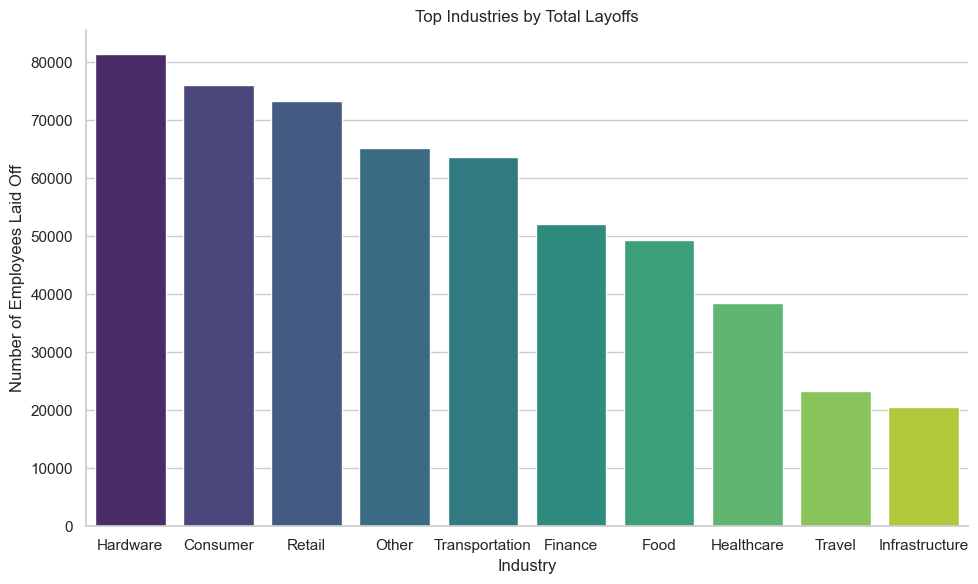

In [98]:
#Industries with the most layoffs
industry_layoffs = layoff_data.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False).head(10)
industry_layoffs = pd.DataFrame(industry_layoffs)

plt.figure(figsize=(10,6))
sns.barplot(data=industry_layoffs, x='Industry', y='Laid_Off', palette='viridis')
plt.title('Top Industries by Total Layoffs', size=12)
plt.xlabel("Industry")
plt.ylabel("Number of Employees Laid Off")
plt.tight_layout()
sns.despine()
plt.savefig("Industries_layoffs.jpg", format="jpg", dpi=300, bbox_inches='tight')
plt.show()



## 📌 Summary Insights

- Layoffs peaked between late 2022 and early 2023, reflecting broader market trends.
- US-based companies reported the highest layoffs, but global effects were notable.
- Late-stage and post-IPO companies are the most culpable.

This analysis provides a snapshot of recent workforce adjustments across tech companies.
